In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('C:/Users/shank/Downloads/Emotion+analysis+using+NLP+-code/Emotion analysis using NLP -code/dataset/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
df_test = pd.read_csv('C:/Users/shank/Downloads/Emotion+analysis+using+NLP+-code/Emotion analysis using NLP -code/dataset/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [7]:
import numpy as np
np.unique(df_train['Sentiment'])

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [8]:
df_train['Sentiment'].replace("anger",0,inplace = True)
df_train['Sentiment'].replace("fear",1,inplace = True)
df_train['Sentiment'].replace("joy",2,inplace = True)
df_train['Sentiment'].replace("love",3,inplace = True)
df_train['Sentiment'].replace("sadness",4,inplace = True)
df_train['Sentiment'].replace("surprise",5,inplace = True)

In [10]:
df_train.head(10)

,Input,Sentiment
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,4
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,1
8,i have been with petronas for years i feel tha...,2
9,i feel romantic too,3


In [11]:
df_train['Sentiment'].replace("anger",0,inplace = True)
df_train['Sentiment'].replace("fear",1,inplace = True)
df_train['Sentiment'].replace("joy",2,inplace = True)
df_train['Sentiment'].replace("love",3,inplace = True)
df_train['Sentiment'].replace("sadness",4,inplace = True)
df_train['Sentiment'].replace("surprise",5,inplace = True)

In [12]:
df_train.head(15)

,Input,Sentiment
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,4
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,1
8,i have been with petronas for years i feel tha...,2
9,i feel romantic too,3


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

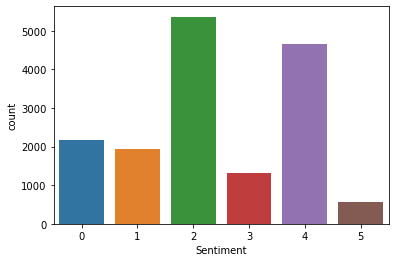

In [13]:
import seaborn as sns
sns.countplot(x="Sentiment",data=df_train)

In [14]:
df_train.isnull().sum()

Input        0
Sentiment    0
dtype: int64

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      16000 non-null  object
 1   Sentiment  16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [16]:
df_train.describe()

,Sentiment
count,16000.000000
mean,2.381063
std,1.444121
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [17]:
x = df_train["Input"]
y = df_train["Sentiment"]

In [19]:
y.head()

0    4
1    4
2    0
3    3
4    0
Name: Sentiment, dtype: int64

In [20]:
print(x.shape,y.shape)

(16000,) (16000,)


In [21]:
message = x.copy()
voc_size = 10000

In [22]:
message[0]

'i didnt feel humiliated'

In [23]:
import re
import nltk
from nltk.corpus import stopwords

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [26]:
corpus[0]

'didnt feel humili'

In [27]:
from tensorflow import keras
from keras_preprocessing.text import one_hot

In [28]:
one_hot_representation = [one_hot(words,voc_size) for words in corpus]

In [29]:
one_hot_representation[0]

[3009, 2474, 3785]

In [30]:
from keras.preprocessing.sequence import pad_sequences

In [31]:
sent_length = 20
embedded_doc = pad_sequences(one_hot_representation,padding='pre',maxlen=sent_length)
embedded_doc[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 3009, 2474, 3785])

In [32]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Dropout,LSTM,Bidirectional

In [33]:
dimension = 40
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='relu'))

In [34]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            400000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
final_input = np.array(embedded_doc)
final_output = np.array(y)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_input, final_output, test_size=0.33, random_state=42)

In [37]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
168/168 [==============================] - 49s 39ms/step - loss: nan - accuracy: 0.1385 - val_loss: nan - val_accuracy: 0.1259
Epoch 2/10
168/168 [==============================] - 4s 25ms/step - loss: nan - accuracy: 0.1444 - val_loss: nan - val_accuracy: 0.1259
Epoch 3/10
168/168 [==============================] - 6s 36ms/step - loss: nan - accuracy: 0.1378 - val_loss: nan - val_accuracy: 0.1259
Epoch 4/10
168/168 [==============================] - 6s 34ms/step - loss: nan - accuracy: 0.1366 - val_loss: nan - val_accuracy: 0.1259
Epoch 5/10
168/168 [==============================] - 6s 34ms/step - loss: nan - accuracy: 0.1452 - val_loss: nan - val_accuracy: 0.1259
Epoch 6/10
168/168 [==============================] - 5s 28ms/step - loss: nan - accuracy: 0.1381 - val_loss: nan - val_accuracy: 0.1259
Epoch 7/10
168/168 [==============================] - 5s 28ms/step - loss: nan - accuracy: 0.1361 - val_loss: nan - val_accuracy: 0.1259
Epoch 8/10
168/168 [====================

In [ ]:
def Linker(x):
  ps=PorterStemmer()
  corpus=[]
  review=re.sub('[^a-zA-Z]',' ',x)
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)


  voc_size = 5000
  one_hot_r = [one_hot(word,voc_size) for word in corpus]

  max_length = 20
  embedded_docs = pad_sequences(one_hot_r,max_length,padding='pre')

  dimension = 40
  model = Sequential()
  model.add(Embedding(voc_size,dimension,input_length=max_length))
  model.add(Bidirectional(LSTM(100)))
  model.add(Dense(1,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
  prediction= model.predict_classes(np.array(embedded_docs))
  if prediction.all() ==0:
    print("person is angry")
  elif prediction.all() ==1:
    print("person is in fear")
  elif prediction.all() ==2:
    print("person is in joy")
  elif prediction.all() ==3:
    print("person is in love")
  elif prediction.all() ==4:
    print("person is sad")
  else:
    print("person is surprise")
x = str(input())

In [ ]:
Linker(x)